# Data Collection & Cleaning
### This notebook contains the methods used to collect and clean the data

In [42]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

In [4]:
#Read .csv file to pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lstetson30/Crohns-Disease-Treatment-Study/main/CrohnD.csv')
df.head()

,Unnamed: 0,ID,nrAdvE,BMI,height,country,sex,age,weight,treat
0,1,19908,4,25.22,163,c1,F,47,67,placebo
1,2,19909,4,23.80,164,c1,F,53,64,d1
2,3,19910,1,23.05,164,c1,F,68,62,placebo
3,4,20908,1,25.71,165,c1,F,48,70,d2
4,5,20909,2,25.95,170,c1,F,67,75,placebo


In [5]:
#Remove first column
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,ID,nrAdvE,BMI,height,country,sex,age,weight,treat
0,19908,4,25.22,163,c1,F,47,67,placebo
1,19909,4,23.80,164,c1,F,53,64,d1
2,19910,1,23.05,164,c1,F,68,62,placebo
3,20908,1,25.71,165,c1,F,48,70,d2
4,20909,2,25.95,170,c1,F,67,75,placebo


#### The attributes are described as follows:
|Attribute |Description                          |
|:---------|:------------------------------------|
|ID        |Unique Patient ID                    |
|nrAdvE    |Number of adverse events             |
|BMI       |Body mass index                      |
|height    |Height in cm                         |
|country   |country code (actual country unknown)|
|sex       |Patient sex                          |
|age       |Patient age                          |
|weight    |Patient weight in kg                 |
|treat     |Patient treatment type               |

In [8]:
#Check how many patients are in this dataset
print('Number of patients: ', df.shape[0])

Number of patients:  117


In [6]:
#Check how many missing values for each attribute
df.isnull().sum()

ID         0
nrAdvE     0
BMI        0
height     0
country    0
sex        0
age        0
weight     0
treat      0
dtype: int64

In [36]:
#Check for ducplicate IDs
print('Number of duplicate IDs: ', len(df) - len(df.drop_duplicates(subset = 'ID')))

Number of duplicate IDs:  0


In [44]:
#Check for number of countries
df['country'].value_counts()

c1    78
c2    39
Name: country, dtype: int64

In [45]:
#Check for number of sexes
df['sex'].value_counts()

F    100
M     17
Name: sex, dtype: int64

In [46]:
#Check for number of treatment types
df['treat'].value_counts()

placebo    39
d1         39
d2         39
Name: treat, dtype: int64

In [9]:
#Check the datatypes of each attribute
df.dtypes

ID           int64
nrAdvE       int64
BMI        float64
height       int64
country     object
sex         object
age          int64
weight       int64
treat       object
dtype: object

---------------------------

#### Initial visualization of the data to find erroneous data entries & make initial observations

### BMI:

<AxesSubplot:xlabel='index', ylabel='BMI'>

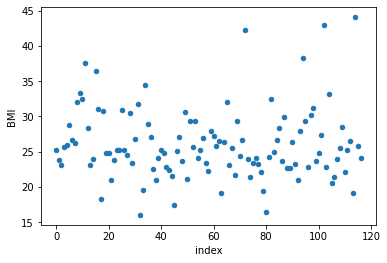

In [40]:
df.reset_index().plot(kind = 'scatter', x = 'index', y = 'BMI')

### Height:

<AxesSubplot:xlabel='index', ylabel='Height (cm)'>

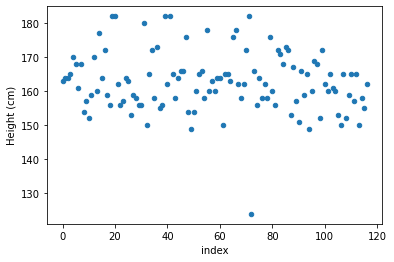

In [27]:
df.reset_index().plot(kind = 'scatter', x = 'index', y = 'height', ylabel = 'Height (cm)')

One height seems to be abnormally low.  Check to see if this is an error

In [23]:
df.loc[df['height'] < 140]

,ID,nrAdvE,BMI,height,country,sex,age,weight,treat,Success
72,28911,9,42.27,124,c1,M,40,65,d1,0


Although this patient's height is an outlier, it is not an unrealistic value

### Weight:

<AxesSubplot:xlabel='index', ylabel='Weight (kg)'>

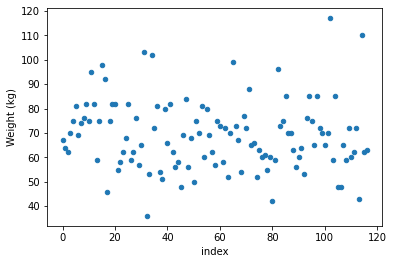

In [28]:
df.reset_index().plot(kind = 'scatter', x = 'index', y = 'weight', ylabel = 'Weight (kg)')

There does not seem to be any significant outliers

### Age:

<AxesSubplot:xlabel='index', ylabel='age'>

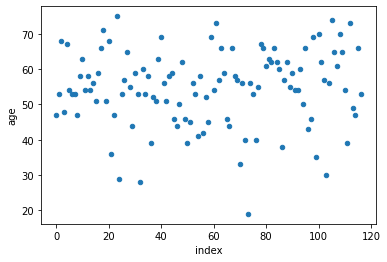

In [41]:
df.reset_index().plot(kind = 'scatter', x = 'index', y = 'age')

### Number of Adverse Events:

Text(0, 0.5, 'Count')

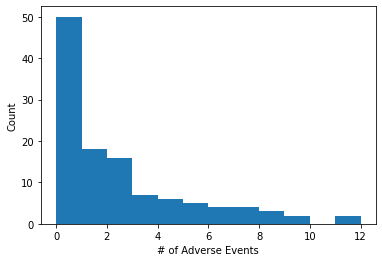

In [60]:
plt.hist(df['nrAdvE'], bins = df['nrAdvE'].max())[2]
plt.xlabel('# of Adverse Events')
plt.ylabel('Count')

-----------------------

#### In order to ultimately make a classification model to predict the success of a given patient, a binary attribute will be created where a success is defined as a patient with no adverse events

In [61]:
#Create a column to classify a treatment as success (nrAdvE = 0) or not (nrAdv > 0)
success = []
for i in df['nrAdvE']:
    if i == 0:
        success.append(1)
    else:
        success.append(0)

df['success']=success
df[['nrAdvE', 'success']].head(10)

,nrAdvE,success
0,4,0
1,4,0
2,1,0
3,1,0
4,2,0
5,2,0
6,3,0
7,0,1
8,1,0
9,0,1


In [62]:
df['success'].value_counts()

0    67
1    50
Name: success, dtype: int64

The df is now written to a csv file (code cell removed) and committed to the Github repository containing this project.

In [65]:
#Write cleaned dataframe to .csv local file (Will be commited to Github repository)
df.to_csv(r"C:\Users\thele\OneDrive\Documents\Crohns Datasets\crohns_cleaned_data.csv", index=False)